In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [12]:
titanic= pd.read_csv("C:/Users/SCIENCE/Downloads/titanic (1).csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [14]:
df.Sex= df.Sex.replace(["male", "female"], [0,1])
df

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_29732\1381438576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex= df.Sex.replace(["male", "female"], [0,1])


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,NaN,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [15]:
df.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [16]:
df.Age = df.Age.replace(np.nan,30)
df.isnull().sum()

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_29732\2420788878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age = df.Age.replace(np.nan,30)


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [17]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
bins = [0,40,150,600]
group_names = ["young", "middle", "old"]
df.Fare = pd.cut(df.Fare, bins=bins, labels=group_names)
df.Fare.value_counts()

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_29732\3263377192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fare = pd.cut(df.Fare, bins=bins, labels=group_names)


Fare
young     700
middle    147
old        29
Name: count, dtype: int64

<Axes: xlabel='Fare', ylabel='count'>

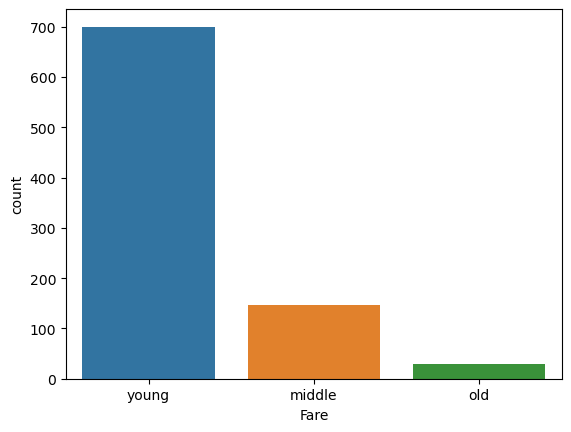

In [19]:
sns.countplot(x=df["Fare"])

In [20]:
lb=LabelEncoder()
df.Fare=lb.fit_transform(df.Fare)
df.tail()

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_29732\650820815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fare=lb.fit_transform(df.Fare)


,Pclass,Sex,Age,SibSp,Parch,Fare
886,2,0,27.0,0,0,2
887,1,1,19.0,0,0,2
888,3,1,30.0,1,2,2
889,1,0,26.0,0,0,2
890,3,0,32.0,0,0,2


In [21]:
x = df.drop("Fare", axis=1)     
y = df["Fare"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test =sc.transform(x_test)
x_train

array([[ 0.80503797, -0.71051454, -0.43238797, -0.47570141, -0.46825896],
       [ 0.80503797,  1.40743072, -0.43238797, -0.47570141, -0.46825896],
       [ 0.80503797, -0.71051454, -0.9199259 ,  0.419652  , -0.46825896],
       ...,
       [ 0.80503797, -0.71051454,  0.05514996, -0.47570141, -0.46825896],
       [-0.40348891,  1.40743072,  2.24907064, -0.47570141, -0.46825896],
       [-1.61201578, -0.71051454,  0.05514996, -0.47570141, -0.46825896]])

In [23]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [24]:
grd =GradientBoostingClassifier()
grd.fit(x_train, y_train)
pred =grd.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        48
           1       0.00      0.00      0.00         7
           2       0.97      0.94      0.95       213
           3       0.00      0.00      0.00         0

    accuracy                           0.89       268
   macro avg       0.43      0.43      0.43       268
weighted avg       0.90      0.89      0.90       268



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
adb = AdaBoostClassifier(n_estimators=450, learning_rate=1)
adb.fit(x_train,y_train)
pred1 = adb.predict(x_test)
print(classification_report(pred1, y_test))

              precision    recall  f1-score   support

           0       0.36      0.86      0.51        21
           1       0.20      0.05      0.08        20
           2       1.00      0.91      0.95       227
           3       0.00      0.00      0.00         0

    accuracy                           0.84       268
   macro avg       0.39      0.45      0.38       268
weighted avg       0.89      0.84      0.85       268



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         BootStrap

In [26]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(x_train,y_train)
prd = bg.predict(x_test)
print(classification_report(prd, y_test))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        48
           1       0.20      0.12      0.15         8
           2       0.96      0.94      0.95       211
           3       0.17      1.00      0.29         1

    accuracy                           0.89       268
   macro avg       0.52      0.71      0.54       268
weighted avg       0.90      0.89      0.89       268



Ordinary Models


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [28]:
models = []
models.append(("lr", LogisticRegression()))
models.append(("sv", SVC()))
models.append(("rf", RandomForestClassifier()))
models.append(("kn", KNeighborsClassifier()))
models.append(("drt", DecisionTreeClassifier()))
print(models)

[('lr', LogisticRegression()), ('sv', SVC()), ('rf', RandomForestClassifier()), ('kn', KNeighborsClassifier()), ('drt', DecisionTreeClassifier())]


In [29]:
results = dict()
for name, model in models:
    fold = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=42)
    cv_results = cross_val_score(model, x_train,y_train, cv=fold, scoring="accuracy")
    results[name]=(cv_results.mean(), cv_results.std())
    
print()
print("mame  results.mean  results.std")
for key, value in results.items():
    print(key, value)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\


mame  results.mean  results.std
lr (0.8923732094463801, 0.039285684479506214)
sv (0.9003639179248935, 0.03627366599396937)
rf (0.8836546651180796, 0.03736342948847321)
kn (0.8891134339914828, 0.03697126315150546)
drt (0.8833139759969026, 0.04200318988711442)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=15.
  warnings.warn(


In [30]:
sv = SVC()
sv.fit(x_train,y_train)
pd = sv.predict(x_test)
print(classification_report(pd, y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        49
           1       0.00      0.00      0.00         0
           2       0.98      0.92      0.95       219
           3       0.00      0.00      0.00         0

    accuracy                           0.90       268
   macro avg       0.44      0.43      0.44       268
weighted avg       0.94      0.90      0.92       268



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
